In [1]:
# Data Analysis
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
# Visualization
from matplotlib import pyplot as plt
import seaborn as sns

# Data Prediction
import sklearn
from sklearn.preprocessing import LabelEncoder
import xgboost

from sklearn.metrics import accuracy_score , precision_score , recall_score, confusion_matrix , roc_auc_score,roc_curve, auc

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)




In [2]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)

Using TensorFlow backend.


In [19]:
data = pd.read_excel('data.xlsx',sheet_name='data')

In [20]:
data.shape

(26307, 73)

In [21]:
data.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,S

In [22]:
## Null Counting Fucntion
def null_values(df):
    
    sum_null = df.isnull().sum()
    total = df.isnull().count()
    percent_nullvalues = 100* sum_null / total 
    df_null = pd.DataFrame()
    df_null['Total'] = total
    df_null['Null_Count'] = sum_null
    df_null['Percent'] = round(percent_nullvalues,2)
    df_null = df_null.sort_values(by='Null_Count',ascending = False)
    df_null = df_null[df_null.Null_Count > 0]
    
    return(df_null)

In [23]:
null_values(data)

,Total,Null_Count,Percent
engineTransmission_engineOil_cc_value_9,26307,26307,100.00
engineTransmission_engine_cc_value_10,26307,26307,100.00
engineTransmission_clutch_cc_value_6,26307,26306,100.00
engineTransmission_engineOil_cc_value_8,26307,26305,99.99
engineTransmission_engine_cc_value_9,26307,26304,99.99
engineTransmission_battery_cc_value_4,26307,26303,99.98
engineTransmission_engine_cc_value_8,26307,26303,99.98
engineTransmission_clutch_cc_value_5,26307,26300,99.97
engineTransmission_coolant_cc_value_3,26307,26299,99.97
engineTransmission_engine_cc_value_7,26307,26299,99.97


In [15]:
'''

The table shows that there are a lot of missing values.
However, fortunately, it is possible to fill in most of the blanks because 'NA' in the data below means 'None' or 0.
Seeing the csv files, we can recognize the facts.

'''

"\n\nThe table shows that there are a lot of missing values.\nHowever, fortunately, it is possible to fill in most of the blanks because 'NA' in the data below means 'None' or 0.\nSeeing the csv files, we can recognize the facts.\n\n"

In [16]:
for col in data.isnull().columns.to_list():
     data[col] = data[col].fillna('None')

In [17]:
null_values(data)

,Total,Null_Count,Percent


In [18]:
data.rating_engineTransmission.value_counts()

4.0    10152
3.5     5944
3.0     4379
4.5     2209
5.0     1623
1.0     1456
2.5      420
2.0      117
1.5        6
0.5        1
Name: rating_engineTransmission, dtype: int64

In [27]:
mapping = {0.5:'1' ,1.0:'2' ,1.5:'3', 2.0:'4' ,2.5:'5' ,3.0:'6' ,3.5:'7' ,4.0:'8' ,4.5:'9', 5.0:'10'}

data.rating_engineTransmission = data.rating_engineTransmission.apply(lambda x: mapping[x])

In [28]:
data.rating_engineTransmission.value_counts()

8     10152
7      5944
6      4379
9      2209
10     1623
2      1456
5       420
4       117
3         6
1         1
Name: rating_engineTransmission, dtype: int64

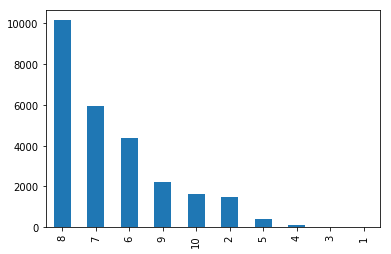

In [29]:
pd.value_counts(data['rating_engineTransmission']).plot.bar()

In [30]:
data[data.rating_engineTransmission=='1']

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
16022,aj_16023,2019-04-02 17:39:25,2004,1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Timing Noise,NaN,NaN,NaN,NaN,No,Silencer assembly damaged,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,54761,1


In [31]:
from datetime import datetime
from dateutil import relativedelta

data['inspectionStartTime']=data['inspectionStartTime'].apply(lambda x : datetime.strftime(x, '%Y-%m'))
data['inspectionStartTime']=data['inspectionStartTime'].apply(lambda x : datetime.strptime(x, '%Y-%m'))


In [32]:
data['registration_date']=data['year'].apply(lambda x: str(x)+'-')+data['month'].apply(lambda x: str(x))

In [33]:
data['registration_date']=data['registration_date'].apply(lambda x :datetime.strptime(x, '%Y-%m'))

In [34]:
data['Duration'] = [relativedelta.relativedelta(dx, dy).months for dx,dy in zip(data.inspectionStartTime,data.registration_date)]

In [35]:
data[data.rating_engineTransmission==2]['fuel_type'].iplot(x='fuel_type' , kind='hist',title='Effect of fuel type on Rating:2')

In [36]:
data[data.rating_engineTransmission==5]['fuel_type'].iplot(x='fuel_type' , kind='hist', title='Effect of fuel type on Rating:5')

In [37]:
data[data.rating_engineTransmission==9]['fuel_type'].iplot(x='fuel_type' , kind='hist', title='Effect of fuel type on Rating:9')

In [38]:
data.groupby('rating_engineTransmission').Duration.mean().iplot(kind='bar',title='Duration variation across different Ratings')

In [39]:
data.groupby('rating_engineTransmission').odometer_reading.mean().iplot(kind='bar',title='Odometer variation across different Ratings')

In [40]:
data_cpy = data.copy()

In [41]:
appointmentId = data['appointmentId']
data.drop(['appointmentId','year','month','registration_date','inspectionStartTime'],1,inplace=True)

In [42]:
cols = data.select_dtypes(include=['object']).columns.to_list()

In [43]:
for i in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[i].values)) 
    data[i] = lbl.transform(list(data[i].values))

(1841490, 1)

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(16, 8))
fig.set_dpi(200)
ax = sns.heatmap(data[data['rating_engineTransmission']==7][['engineTransmission_battery_cc_value_0', 'engineTransmission_battery_cc_value_1', 'engineTransmission_battery_cc_value_2', 'engineTransmission_battery_cc_value_3','engineTransmission_battery_cc_value_4']].corr(), ax = axes[0], cmap='coolwarm')
ax.set_title('7')
ax = sns.heatmap(data[data['rating_engineTransmission']==8][['engineTransmission_battery_cc_value_0', 'engineTransmission_battery_cc_value_1', 'engineTransmission_battery_cc_value_2', 'engineTransmission_battery_cc_value_3','engineTransmission_battery_cc_value_4']].corr(), ax = axes[1], cmap='coolwarm')
ax.set_title('8')
ax = sns.heatmap(data[data['rating_engineTransmission']==9][['engineTransmission_battery_cc_value_0', 'engineTransmission_battery_cc_value_1', 'engineTransmission_battery_cc_value_2', 'engineTransmission_battery_cc_value_3','engineTransmission_battery_cc_value_4']].corr(), ax = axes[2], cmap='coolwarm')
ax = ax.set_title('9')

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'rating_engineTransmission', y = 'odometer_reading', data = data)


In [57]:
data['odometer_readingLog'] = np.log(data.odometer_reading)

corr = data.corr().abs()
corr.odometer_readingLog[corr.odometer_readingLog >= 0.5].sort_values(ascending=False)

odometer_readingLog    1.000000
odometer_reading       0.813523
Name: odometer_readingLog, dtype: float64

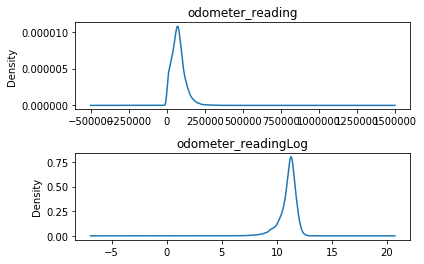

In [58]:
# By log tranformation, right skewed distribution can be a normal form.
plt.subplot2grid((2,1),(0,0))
data.odometer_reading.plot(kind='kde')
plt.title('odometer_reading')

plt.subplot2grid((2,1),(1,0))
data.odometer_readingLog.plot(kind='kde')
plt.title('odometer_readingLog')

plt.subplots_adjust(hspace = 0.5, wspace = 0.3)
plt.show()

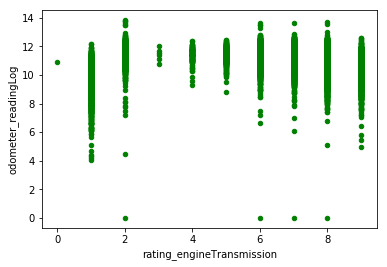

In [59]:
data.plot.scatter(x='rating_engineTransmission', y='odometer_readingLog', color = 'green')
plt.show()

In [60]:
# Drop the outliers in odometer_readingLog through the 95% confidence interval below.
for i in np.arange(10):
    pno = data.odometer_readingLog[data.rating_engineTransmission == i+1]
    n = len(pno)
    mean = pno.mean()
    std = pno.std()
    upper_interval = mean + 1.96 * std
    lower_interval = mean - 1.96 * std
    data = data.drop(data[(data.rating_engineTransmission == i+1) & (data.odometer_readingLog > upper_interval)].index)
    data = data.drop(data[(data.rating_engineTransmission == i+1) & (data.odometer_readingLog < lower_interval)].index)
    
print(data.shape)

(25114, 71)


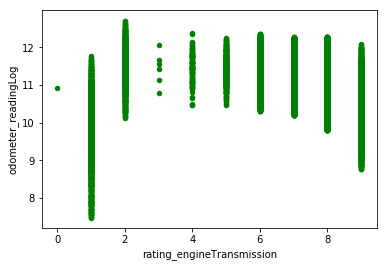

In [61]:
data.plot.scatter(x='rating_engineTransmission', y='odometer_readingLog', color = 'green')
plt.show()

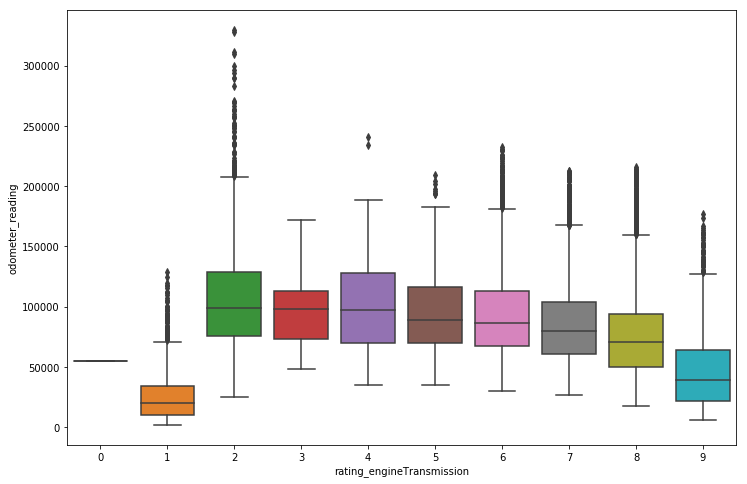

In [62]:
plt.figure(figsize=(12,8))
sns.boxplot(x = 'rating_engineTransmission', y = 'odometer_reading', data = data)

In [63]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca_data = pca.fit_transform(data)

principalDf = pd.DataFrame(data = pca_data
             , columns = ['principal component 1', 'principal component 2'])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [453]:
finalDf = pd.concat([principalDf, data[['rating_engineTransmission']]], axis = 1)

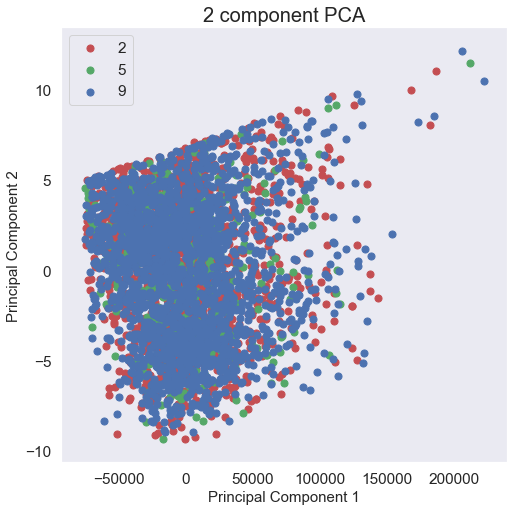

In [512]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets =  [2, 5, 9]
colors = ['r', 'g', 'b']

for target, color in zip(targets,colors):
    indicesToKeep = finalDf['rating_engineTransmission'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [64]:
target = data.rating_engineTransmission
data.drop(['rating_engineTransmission','odometer_reading'],1,inplace=True)

In [65]:
data.head()

,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,Duration,odometer_readingLog
0,0,4,4,3,2,1,1,1,0,5,0,3,0,5,4,3,2,1,NaN,0,8,3,10,9,8,7,5,3,2,2,NaN,0,1,0,2,1,0,1,0,0,5,3,2,0,2,0,5,0,0,0,6,6,5,4,3,1,1,1,4,3,2,3,5,4,2,1,4,6,11.732864
1,1,5,4,3,2,1,1,1,0,5,0,3,0,1,4,3,2,1,NaN,0,6,3,10,9,8,7,5,3,2,2,NaN,0,1,0,2,1,1,3,0,4,3,0,4,3,2,0,3,1,1,1,7,6,5,4,3,1,1,1,4,3,2,6,6,4,2,1,4,8,11.265848
2,1,5,4,3,2,1,1,1,0,0,8,7,6,5,4,3,2,1,NaN,1,12,11,10,9,8,7,5,3,2,2,NaN,0,0,3,2,1,0,1,0,0,1,5,4,3,2,0,0,1,3,0,3,5,5,4,3,1,1,1,4,3,2,6,6,4,2,1,0,9,11.444090
3,1,5,4,3,2,1,1,1,0,0,8,7,6,5,4,3,2,1,NaN,1,12,11,10,9,8,7,5,3,2,2,NaN,0,0,3,2,1,1,3,1,7,6,5,4,3,2,1,6,1,1,0,3,6,5,4,3,1,1,1,4,3,2,6,6,4,2,1,4,0,10.783799
4,1,5,4,3,2,1,1,1,0,5,3,7,6,5,4,3,2,1,NaN,0,6,5,3,9,8,7,5,3,2,2,NaN,1,4,3,2,1,0,1,0,4,3,0,4,3,2,0,5,1,1,0,6,3,5,4,3,1,1,1,4,3,2,6,6,4,2,1,4,6,11.216781


In [66]:
X_resampled, y_resampled = RandomOverSampler(sampling_strategy='minority').fit_resample(data, target)

In [67]:
from collections import Counter
print(sorted(Counter(y_resampled).items()))

[(0, 9638), (1, 1545), (2, 1416), (3, 6), (4, 111), (5, 397), (6, 4195), (7, 5686), (8, 9638), (9, 2119)]


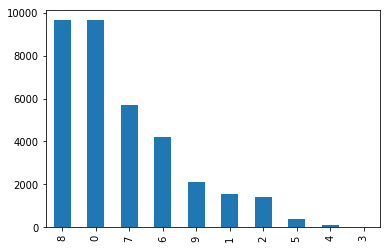

In [68]:
pd.value_counts(y_resampled).plot.bar()

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1, random_state=42, stratify=y_resampled)

In [92]:
xgb = xgboost.XGBClassifier(verbosity=1,
                      learning_rate=0.01,  
                      colsample_bytree = 0.4,
                      subsample = 0.8,
                      objective='multi:softmax', 
                      n_estimators=5000, 
                      reg_alpha = 10,reg_lambda=10,
                  max_depth=14, booster='gbtree',gamma=10,num_parallel_tree=4)


In [93]:
#model complexity: max depth, gamma
#randomness:  subsample and colsample_bytree.
#Balance the positive and negative weights via scale_pos_weight

In [94]:
xgb.fit(X_train, y_train,eval_metric = "mlogloss")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=14,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=5000, n_jobs=0, num_parallel_tree=4,
              objective='multi:softprob', random_state=0, reg_alpha=10,
              reg_lambda=10, scale_pos_weight=None, subsample=0.8,
              tree_method=None, validate_parameters=False, verbosity=1)

In [95]:
y_pred = xgb.predict(X_test)

In [96]:
print('Accuracy:' ,accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.6668584579976985
Precision: 0.6536067344396423
Recall: 0.6668584579976985


In [97]:
# prediction on original dataset before upsampling
print('Accuracy:' ,accuracy_score(target, xgb.predict(data)))
print('Precision:', precision_score(target, xgb.predict(data), average='weighted'))
print('Recall:', recall_score(target, xgb.predict(data), average='weighted'))

Accuracy: 0.5413315282312654
Precision: 0.5323615423525343
Recall: 0.5413315282312654


In [407]:
'''
Cross Validation make sure model doesn't overfit

'''

from sklearn.model_selection import cross_val_score
scores = cross_val_score(xgb, X_train, y_train, cv=5, scoring = "accuracy", verbose=2, n_jobs= -1 )
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Scores: [0.65947242 0.66442846 0.67114309 0.66586731 0.66506795]
Mean: 0.6651958433253398
Standard Deviation: 0.0037197672608608517


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 17.1min finished


In [421]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       964
           1       0.64      0.79      0.71       154
           2       0.78      0.78      0.78       142
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        40
           6       0.48      0.44      0.46       420
           7       0.40      0.17      0.24       569
           8       0.54      0.84      0.66       964
           9       0.80      0.17      0.29       212

    accuracy                           0.67      3476
   macro avg       0.52      0.47      0.46      3476
weighted avg       0.66      0.67      0.64      3476



In [415]:
mat=confusion_matrix(y_test,y_pred)

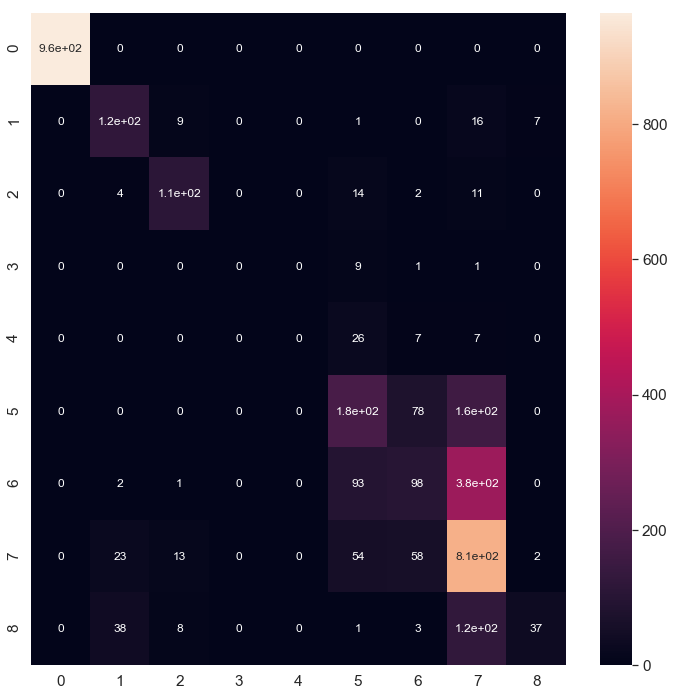

In [416]:
plt.figure(figsize = (12,12))
sns.set(font_scale=1.4) # for label size
sns.heatmap( mat,annot=True, annot_kws={"size": 12}) # font size
plt.show()


In [417]:
importances = pd.DataFrame({
    'Feature': X_resampled.columns,
    'Importance': xgb.feature_importances_*100
})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.set_index('Feature')

In [514]:
importances.iplot(kind='bar',title='Feature Importance Plot: XGBoost')

In [525]:
xgb.save_model('xgboost.txt')